- H0: 연구개발비(RD)는 디지털화 수준(FPS, MPS, BBS, IU, DDI)과 유의미한 관계가 없다.
- H1: 연구개발비(RD)는 디지털화 수준(FPS, MPS, BBS, IU, DDI)과 유의미한 관계가 있다.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Excel 파일 읽기
df = pd.read_csv('C:/Users/82106/Desktop/디지털화의 경제 영향도/데이터/processed_digitalization_data.csv')

df.head()

,Country,id,Year,INCOME,LGDP,FPS,MPS,BBS,IU,DDI,GFCF,TO,Labor,LCPI,LPOP,CONSUM,RD
0,Pays Bas,1,2000,1,10.607994,0.620927,0.675303,0.016325,0.439844,0.39172,0.225702,1.255219,1.27381,4.406078,16.583433,0.364773,0.017898
1,Pays Bas,1,2001,1,10.623448,0.509298,0.685303,0.026325,0.449844,0.26795,0.235702,1.275219,1.28668,4.446796,16.590981,0.369977,0.017961
2,Pays Bas,1,2002,1,10.619236,0.498189,0.695303,0.036325,0.459844,0.29133,0.245702,1.295219,1.30062,4.479143,16.597364,0.372896,0.017454
3,Pays Bas,1,2003,1,10.616073,0.484293,0.705303,0.046325,0.469844,0.31063,0.255702,1.315219,1.29774,4.499847,16.602082,0.382046,0.017839
4,Pays Bas,1,2004,1,10.632253,0.482649,0.715303,0.056325,0.479844,0.34787,0.265702,1.335219,1.30060,4.512404,16.605557,0.374042,0.017890


In [7]:
# 상관관계 수행
correlation_matrix = df[['RD','DDI','IU']].corr()

#상관계수의 p-value 계산
def calculate_pvalues(df):
    pvalues = np.zeros((df.shape[1], df.shape[1]))
    for i in range(df.shape[1]):
        for j in range(df.shape[1]):
            stat, p = stats.pearsonr(df.iloc[:,i], df.iloc[:,j])
            pvalues[i,j] = p
        return pd.DataFrame(pvalues, columns=df.columns, index=df.columns)
    
p_values = calculate_pvalues(df[['RD','DDI','IU']])


In [8]:
p_values

,RD,DDI,IU
RD,0.0,3.732444e-300,1.535214e-220
DDI,0.0,0.000000e+00,0.000000e+00
IU,0.0,0.000000e+00,0.000000e+00


연구개발비와 DDI,IU의 상관관계는 통계적으로 유의미하다.

### FPS와 MPS가 LGDP에 미치는 영향의 차이를 검정

In [14]:
# 두변수와 LGDP의 상관관계 분석
correlation_fps = stats.pearsonr(df['FPS'],df['LGDP'])
correlation_mps = stats.pearsonr(df['MPS'],df['LGDP'])

correlation_fps
correlation_mps

# Fisher's Z-transformation을 사용한 상관계수 차이 검정
def compare_correlations(r1, r2, n1, n2):
    z1 = np.arctanh(r1)
    z2 = np.arctanh(r2)
    se = np.sqrt(1/(n1-3) + 1/(n2-3))
    z = (z1-z2)/se
    p = 2*(1-stats.norm.cdf(abs(z)))
    return z, p

In [15]:
# 상관계수 차이 검정
z_stat, p_val = compare_correlations(
    correlation_fps[0], 
    correlation_mps[0], 
    len(df), 
    len(df)
)

print('z-통계량:', round(z_stat,4))
print('p-value:', round(p_val,4))


z-통계량: 20.6582
p-value: 0.0


- 상관관계 차이가 20.6582 표준오차 만큼 크다는것을 나타낸다.
- 매우높은값으로 , 두 상관계수간 차이가 명확하다.

***MPS와 FPS는 확실한 차이가 있다는것을 알수있다***

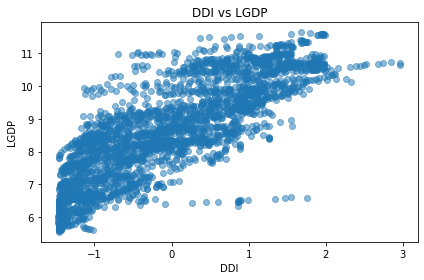

In [27]:
plt.subplot(1, 1, 1)
plt.scatter(df['DDI'], df['LGDP'], alpha=0.5)

plt.xlabel('DDI')
plt.ylabel('LGDP')
plt.title('DDI vs LGDP')

plt.tight_layout()
plt.show()

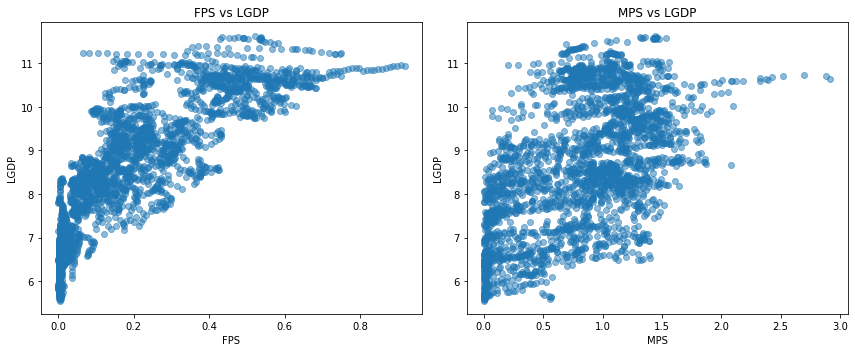

In [26]:
# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['FPS'], df['LGDP'], alpha=0.5)

plt.xlabel('FPS')
plt.ylabel('LGDP')
plt.title('FPS vs LGDP')

#시각화 2
plt.subplot(1, 2, 2)
plt.scatter(df['MPS'], df['LGDP'], alpha=0.5)

plt.xlabel('MPS')
plt.ylabel('LGDP')
plt.title('MPS vs LGDP')

plt.tight_layout()
plt.show()